In [1]:
from bw_recipe_2016 import GlobalWarming
from bw_recipe_2016 import get_biosphere_database, extract_recipe

In [2]:
data = extract_recipe()[2]

In [3]:
biosphere = get_biosphere_database()

In [4]:
gw = GlobalWarming(data, biosphere)

In [5]:
gw.apply_strategies()

Applying strategy: fix_perspective_string
Applying strategy: generic_reformat
Applying strategy: split_synonyms
Applying strategy: more_synonyms
Applying strategy: fix_unit_string
Applying strategy: name_matcher
Applying strategy: add_biomass_stock_cfs
Applying strategy: add_air_category
Applying strategy: complete_method_name
Applying strategy: match_multiple
Applied 10 strategies in 0.02 seconds


In [6]:
gw.data[0]

{'name': ('ReCiPe 2016', 'v1.1 (20180117)', 'GWP20', 'Individualist'),
 'unit': 'kg CO2eq/kg GHG',
 'filename': 'ReCiPe2016_CFs_v1.1_20180117.xlsx',
 'description': '',
 'exchanges': [{'name': 'HCFC-122',
   'synonyms': [''],
   'formula': 'CHCl2CF2Cl',
   'amount': 218.0,
   'categories': ('air',)},
  {'name': 'HCFC-122a',
   'synonyms': [''],
   'formula': 'CHFClCFCl2',
   'amount': 945.0,
   'categories': ('air',)},
  {'name': 'HCFC-123a',
   'synonyms': [''],
   'formula': 'CHClFCF2Cl',
   'amount': 1350.0,
   'categories': ('air',)},
  {'name': 'HCFC-132c',
   'synonyms': [''],
   'formula': 'CH2FCFCl2',
   'amount': 1230.0,
   'categories': ('air',)},
  {'name': 'HCFC-225ca',
   'synonyms': [''],
   'formula': 'CHCl2CF2CF3',
   'amount': 469.0,
   'categories': ('air',)},
  {'name': 'HCFC-225cb',
   'synonyms': [''],
   'formula': 'CHClFCF2CClF2',
   'amount': 1860.0,
   'categories': ('air',)},
  {'name': '(E)-1-Chloro-3,3,3-trifluoroprop-1-ene',
   'synonyms': [''],
   'formula

In [7]:
gw.write_excel("global-warming")

Wrote matching file to:
/Users/cmutel/Library/Application Support/Brightway3/default.c21f969b/output/lcia-matching-global-warming.xlsx


In [8]:
gw.statistics()

3 methods
1041 cfs
477 unlinked cfs


(3, 1041, 477)

In [9]:
c = gw.compare_to_previous()

In [10]:
[(key, len(c[key])) for key in c]

[('found', 39), ('missing', 159), ('reference', 40)]

Present in previous ReCiPe, missing here

In [11]:
c['reference'].difference(c['found'])

{'dimethyl ether', 'ethane, 1,1,1-trichloro-, hcfc-140'}

In [12]:
c['found']

{'carbon dioxide, fossil',
 'carbon dioxide, from soil or biomass stock',
 'carbon dioxide, to soil or biomass stock',
 'chloroform',
 'dinitrogen monoxide',
 'ethane, 1,1,1,2-tetrafluoro-, hfc-134a',
 'ethane, 1,1,1-trifluoro-, hfc-143a',
 'ethane, 1,1,2-trichloro-1,2,2-trifluoro-, cfc-113',
 'ethane, 1,1-dichloro-1-fluoro-, hcfc-141b',
 'ethane, 1,1-difluoro-, hfc-152a',
 'ethane, 1,2-dichloro-1,1,2,2-tetrafluoro-, cfc-114',
 'ethane, 1-chloro-1,1-difluoro-, hcfc-142b',
 'ethane, 2,2-dichloro-1,1,1-trifluoro-, hcfc-123',
 'ethane, 2-chloro-1,1,1,2-tetrafluoro-, hcfc-124',
 'ethane, chloropentafluoro-, cfc-115',
 'ethane, hexafluoro-, hfc-116',
 'ethane, pentafluoro-, hfc-125',
 'hydrocarbons, chlorinated',
 'methane',
 'methane, bromo-, halon 1001',
 'methane, bromochlorodifluoro-, halon 1211',
 'methane, bromotrifluoro-, halon 1301',
 'methane, chlorodifluoro-, hcfc-22',
 'methane, chlorotrifluoro-, cfc-13',
 'methane, dichloro-, hcc-30',
 'methane, dichlorodifluoro-, cfc-12',
 'met

In [19]:
gw.drop_unlinked()

Applying strategy: drop_unlinked_cfs
Applied 1 strategies in 0.00 seconds


In [20]:
gw.write_methods()

Wrote 3 LCIA methods with 564 characterization factors


In [23]:
gw.data[2]['name']

('ReCiPe 2016', 'v1.1 (20180117)', 'GWP1000', 'Egalitarian')

# Compare to previous ReCiPe method

In [13]:
%matplotlib inline

In [37]:
import bw2data, bw2calc
import pyprind
import seaborn as sb
import numpy as np

In [15]:
keys = sorted([x.key for x in bw2data.Database("ecoinvent 3.6 cutoff")])

In [16]:
results_reference, results_2016 = [], []

In [26]:
lca = bw2calc.LCA({keys[0]: 1}, gw.previous_reference)
lca.lci()
lca.lcia()

In [28]:
reference_cm = lca.characterization_matrix.copy()

In [29]:
lca.switch_method(('ReCiPe 2016', 'v1.1 (20180117)', 'GWP1000', 'Egalitarian'))

In [30]:
lca.characterization_matrix.sum(), reference_cm.sum()

(203067.27276086807, 228300.72999954224)

In [31]:
new_cm = lca.characterization_matrix.copy()

In [32]:
for key in pyprind.prog_bar(keys):
    lca.redo_lci({key: 1})
    results_reference.append((reference_cm * lca.inventory).sum())
    results_2016.append((new_cm * lca.inventory).sum())    

0% [##############################] 100% | ETA: 00:00:00
Total time elapsed: 00:04:52


/Users/cmutel/miniconda3/envs/bw2dev/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log10
  """Entry point for launching an IPython kernel.


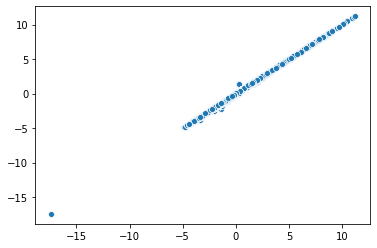

In [41]:
sb.scatterplot(np.log10(np.array(results_reference)), np.log10(np.array(results_2016)))

In [38]:
def masked_ratio(a, b):
    a, b = np.array(a), np.array(b)
    mask = (a != 0) * (b != 0)
    return a / b

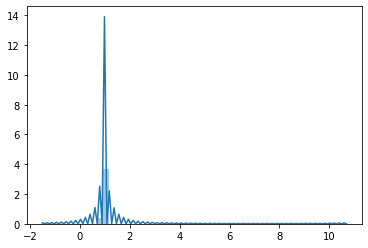

In [40]:
sb.distplot(masked_ratio(results_2016, results_reference))

In [52]:
def abnormal_ratio(a, b):
    if not a or not b:
        return
    ratio = abs(a / b)
    if 0.8 < ratio < 1.25:
        return
    return ratio

In [53]:
exceptions = sorted([
    (abnormal_ratio(results_2016[i], results_reference[i]), bw2data.get_activity(key)) 
    for i, key in enumerate(keys) 
    if abnormal_ratio(results_2016[i], results_reference[i])
], reverse=True)

In [56]:
len(exceptions)

394

In [54]:
exceptions[:10]

[(10.686339111495535,
  'seawater reverse osmosis module production, 8-inch spiral wound, enhanced' (square meter, GLO, None)),
 (10.432727014102408,
  'market for seawater reverse osmosis module' (square meter, GLO, None)),
 (10.362245255571732,
  'seawater reverse osmosis module production, 8-inch spiral wound, baseline' (square meter, GLO, None)),
 (2.485796676144368,
  'hardwood forestry, eucalyptus ssp., planted forest management' (kilogram, BR-SP, None)),
 (2.2007789001450324,
  'market for bagasse, from sugarcane' (kilogram, BR, None)),
 (2.124535621542019, 'almond production' (kilogram, US, None)),
 (2.0171727701564333,
  'sugarcane processing, modern annexed plant' (kilogram, BR, None)),
 (2.0171727363562457,
  'sugarcane processing, modern annexed plant' (kilogram, BR, None)),
 (2.0171727363562457,
  'sugarcane processing, modern annexed plant' (kilogram, BR, None)),
 (2.0171727344930623,
  'sugarcane processing, modern annexed plant' (kilowatt hour, BR, None))]

In [55]:
lca.redo_lci({exceptions[0][1]: 1})
lca.characterized_inventory = new_cm * lca.inventory

In [58]:
{tuple(o['categories']) for o in gw.biosphere}

{('air',),
 ('air', 'indoor'),
 ('air', 'low population density, long-term'),
 ('air', 'lower stratosphere + upper troposphere'),
 ('air', 'non-urban air or from high stacks'),
 ('air', 'urban air close to ground'),
 ('economic', 'primary production factor'),
 ('natural resource', 'biotic'),
 ('natural resource', 'fossil well'),
 ('natural resource', 'in air'),
 ('natural resource', 'in ground'),
 ('natural resource', 'in water'),
 ('natural resource', 'land'),
 ('social',),
 ('soil',),
 ('soil', 'agricultural'),
 ('soil', 'forestry'),
 ('soil', 'industrial'),
 ('water',),
 ('water', 'fossil well'),
 ('water', 'ground-'),
 ('water', 'ground-, long-term'),
 ('water', 'ocean'),
 ('water', 'surface water')}